In [1]:
include("AutomDiff.jl")
using AD

# Tarea4: Derivación automática 2

Fecha de envío del PR inicial: **viernes 7 de abril**

Fecha de aceptación del PR: **martes 18 de abril, antes de la clase**

---

## Ejercicio 1

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.io/en/stable/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea4.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Pueden aprovechar las capacidades de Julia en metaprogramming.

In [2]:
import Base: sqrt, cbrt

sqrt(a::Dual) = Dual(sqrt(a.fun), 0.5 * a.der / sqrt(a.fun))
cbrt(a::Dual) = Dual(cbrt(a.fun), (1/3) * a.der / cbrt(a.fun^2))

cbrt (generic function with 7 methods)

In [3]:
import Base: exp, log

exp(a::Dual) = Dual(exp(a.fun), a.der * exp(a.fun))
log(a::Dual) = Dual(log(a.fun), a.der / a.fun)

log (generic function with 19 methods)

In [4]:
import Base: sin, cos, tan

sin(a::Dual) = Dual(sin(a.fun), a.der * cos(a.fun))
cos(a::Dual) = Dual(cos(a.fun), -a.der * sin(a.fun))
tan(a::Dual) = Dual(tan(a.fun), a.der * sec(a.fun)^2)

tan (generic function with 11 methods)

In [5]:
import Base: sec, csc, cot

sec(a::Dual) = Dual(sec(a.fun), a.der * tan(a.fun) * sec(a.fun))
csc(a::Dual) = Dual(csc(a.fun), -a.der * cot(a.fun) * csc(a.fun))
cot(a::Dual) = Dual(cot(a.fun), -a.der * csc(a.fun)^2)

cot (generic function with 5 methods)

In [6]:
import Base: sinh, cosh, tanh

sinh(a::Dual) = Dual(sinh(a.fun), a.der * cosh(a.fun))
cosh(a::Dual) = Dual(cosh(a.fun), a.der * sinh(a.fun))
tanh(a::Dual) = Dual(tanh(a.fun), a.der * sech(a.fun)^2)

tanh (generic function with 13 methods)

In [7]:
import Base: sech, csch, coth

sech(a::Dual) = Dual(sech(a.fun), -a.der * tanh(a.fun) * sech(a.fun))
csch(a::Dual) = Dual(csch(a.fun), -a.der * coth(a.fun) * csch(a.fun))
coth(a::Dual) = Dual(coth(a.fun), -a.der * csch(a.fun)^2)

coth (generic function with 6 methods)

---

## Ejercicio 2

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [8]:
x_0 = xdual(2)

AD.Dual{Int64}(2,1)

In [9]:
f(x) = sin(x^3 - 2 / x^6)

f (generic function with 1 method)

In [10]:
f(x_0)

AD.Dual{Float64}(0.9934213368955197,-1.384934905523464)

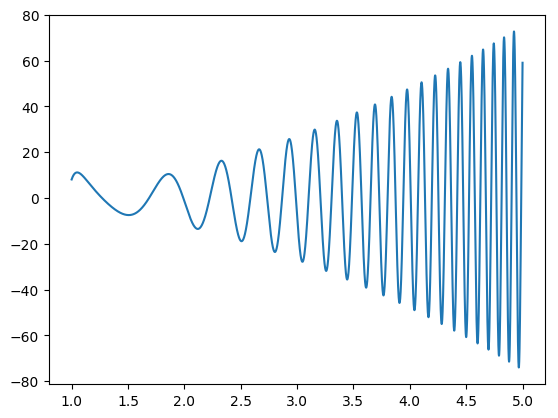

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe95b231e90>

In [11]:
using PyPlot

x = linspace(1, 5, 10000)
y = ones(x)

for i = 1:length(x)
    x_0 = xdual(x[i])
    y[i] = f(x_0).der
end

plot(x, y)

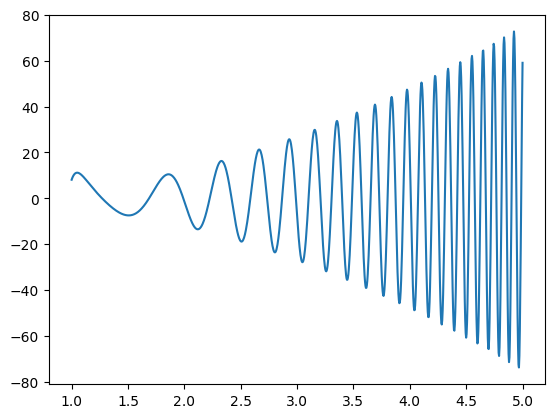

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe95af66850>

In [15]:
x = linspace(1, 5, 1000)
y = zeros(x)

x_0 = xdual.(x)

y = der.(f.(x_0))

plot(x, y)

---

## Ejercicio 3

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

---

## Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea, aunque sí se les dará retroalimentación respecto a lo que escriben. La idea es empezar a pensar en esto.